## Barangay Names in the Philippines

*Barangays* (similar to villages or boroughs) is the smallest administrative unit in the Philippines. There are over 42,000 barangays located within 1,642 cities and municipalities in 81 provinces.

Data source is Humanitarian Data Exchange from the UN OCHA, which cites the Philippine Statistics Authority and the National Mapping and Resource Information Authority as source. Excel and Shape files are available and have been downloaded. https://data.humdata.org/dataset/cod-ab-phl The original data contains the name and Philippine Standard Geographic Code or PSGC of each administrative level, in addition to other information:
* ADM_4 - Barangay
* ADM_3 - City/Municipality
* ADM_2 - Province
* ADM_1 - Region
* ADM_0 - Country
* Area in square kilometers

**What I want to do is to create a toponymic map of barangays looking at the following:**
* Which barangay names are the most common?
* Put them in categories and count to get a sense of how barangays are named across the country. Example: Religious (saints) or Historical figures (national heroes) or politicians
* After putting them into categories, look at possible subcategories
* Look at other interesting information

In [1]:
import pandas as pd
import numpy as np
import warnings, os
import re
import matplotlib.pyplot as plt

In [2]:
original = pd.read_excel('barangays.xlsx')

original.head()

/Users/aikarey/.pyenv/versions/3.12.0/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,AREA_SQKM
0,Adams (Pob.),PH0102801001,NaN,Adams,PH0102801,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09,2023-11-06,NaN,111.143026
1,Bani,PH0102802001,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09,2023-11-06,NaN,1.759757
2,Buyon,PH0102802002,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09,2023-11-06,NaN,3.872158
3,Cabaruan,PH0102802003,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09,2023-11-06,NaN,2.985220
4,Cabulalaan,PH0102802004,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09,2023-11-06,NaN,1.017535


In [3]:
original.isna().sum()

ADM4_EN           0
ADM4_PCODE        0
ADM4_REF      41584
ADM3_EN           0
ADM3_PCODE        0
ADM2_EN           0
ADM2_PCODE        0
ADM1_EN           0
ADM1_PCODE        0
ADM0_EN           0
ADM0_PCODE        0
date              0
validOn           0
validTo       42048
AREA_SQKM         0
dtype: int64

In [4]:
clean = original.dropna(axis='columns',how='all')

In [5]:
clean.columns = clean.columns.str.lower()

clean.head()

,adm4_en,adm4_pcode,adm4_ref,adm3_en,adm3_pcode,adm2_en,adm2_pcode,adm1_en,adm1_pcode,adm0_en,adm0_pcode,date,validon,area_sqkm
0,Adams (Pob.),PH0102801001,NaN,Adams,PH0102801,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09,2023-11-06,111.143026
1,Bani,PH0102802001,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09,2023-11-06,1.759757
2,Buyon,PH0102802002,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09,2023-11-06,3.872158
3,Cabaruan,PH0102802003,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09,2023-11-06,2.985220
4,Cabulalaan,PH0102802004,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09,2023-11-06,1.017535


In [6]:
# Don't need date and valid on columns

clean.drop(columns=['date', 'validon'], inplace=True)

clean.head()

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/4021997605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.drop(columns=['date', 'validon'], inplace=True)


,adm4_en,adm4_pcode,adm4_ref,adm3_en,adm3_pcode,adm2_en,adm2_pcode,adm1_en,adm1_pcode,adm0_en,adm0_pcode,area_sqkm
0,Adams (Pob.),PH0102801001,NaN,Adams,PH0102801,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,111.143026
1,Bani,PH0102802001,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,1.759757
2,Buyon,PH0102802002,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,3.872158
3,Cabaruan,PH0102802003,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2.985220
4,Cabulalaan,PH0102802004,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,1.017535


In [7]:
clean.rename(columns={'adm4_en': 'barangay_raw',
                      'adm4_pcode': 'barangay_psgc',
                      'adm4_ref': 'barangay_clean',
                      'adm3_en': 'city/municipality',
                      'adm3_pcode': 'city/mun_psgc',
                      'adm2_en': 'province',
                      'adm2_pcode': 'province_psgc',
                      'adm1_en': 'region',
                      'adm1_pcode': 'region_psgc',
                      'adm0_en': 'country',
                      'adm0_pcode': 'country_psgc'
                     }, inplace=True)

clean.head()

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/1346434725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.rename(columns={'adm4_en': 'barangay_raw',


,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region,region_psgc,country,country_psgc,area_sqkm
0,Adams (Pob.),PH0102801001,NaN,Adams,PH0102801,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,111.143026
1,Bani,PH0102802001,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,1.759757
2,Buyon,PH0102802002,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,3.872158
3,Cabaruan,PH0102802003,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2.985220
4,Cabulalaan,PH0102802004,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,1.017535


## Cleaning the country column

In [8]:
clean['country'] = clean['country'].replace({'Philippines (the)': 'The Philippines'})

clean.head()

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/761500790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['country'] = clean['country'].replace({'Philippines (the)': 'The Philippines'})


,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region,region_psgc,country,country_psgc,area_sqkm
0,Adams (Pob.),PH0102801001,NaN,Adams,PH0102801,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,The Philippines,PH,111.143026
1,Bani,PH0102802001,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,The Philippines,PH,1.759757
2,Buyon,PH0102802002,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,The Philippines,PH,3.872158
3,Cabaruan,PH0102802003,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,The Philippines,PH,2.985220
4,Cabulalaan,PH0102802004,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,The Philippines,PH,1.017535


## Cleaning the Region column

In [9]:
clean.rename(columns={'region': 'region_number'}, inplace=True)

clean.head()

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/4113942890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.rename(columns={'region': 'region_number'}, inplace=True)


,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm
0,Adams (Pob.),PH0102801001,NaN,Adams,PH0102801,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,The Philippines,PH,111.143026
1,Bani,PH0102802001,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,The Philippines,PH,1.759757
2,Buyon,PH0102802002,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,The Philippines,PH,3.872158
3,Cabaruan,PH0102802003,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,The Philippines,PH,2.985220
4,Cabulalaan,PH0102802004,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,The Philippines,PH,1.017535


In [10]:
clean[['region_number', 'region_name']] = clean['region_number'].str.extract(r'^(.*?)\s*\((.*?)\)$')

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/3965758937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean[['region_number', 'region_name']] = clean['region_number'].str.extract(r'^(.*?)\s*\((.*?)\)$')
/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/3965758937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean[['region_number', 'region_name']] = clean['region_number'].str.extract(r'^(.*?)\s*\((.*?)\)$')


In [11]:
clean.tail(20)

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name
42028,Nabundas,PH1909906005,NaN,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,Bangsamoro Autonomous Region In Muslim Mindanao,PH19,The Philippines,PH,5.390206,BARMM
42029,Nalapaan,PH1909906006,NaN,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,Bangsamoro Autonomous Region In Muslim Mindanao,PH19,The Philippines,PH,6.862481,BARMM
42030,Nunguan,PH1909906007,NaN,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,Bangsamoro Autonomous Region In Muslim Mindanao,PH19,The Philippines,PH,13.834032,BARMM
42031,Panicupan,PH1909906008,NaN,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,Bangsamoro Autonomous Region In Muslim Mindanao,PH19,The Philippines,PH,5.138113,BARMM
42032,Bagoaingud (Bagoinged),PH1909907001,NaN,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,Bangsamoro Autonomous Region In Muslim Mindanao,PH19,The Philippines,PH,2.817731,BARMM
42033,Barungis,PH1909907002,NaN,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,Bangsamoro Autonomous Region In Muslim Mindanao,PH19,The Philippines,PH,5.357598,BARMM
42034,Buliok,PH1909907003,NaN,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,Bangsamoro Autonomous Region In Muslim Mindanao,PH19,The Philippines,PH,7.637749,BARMM
42035,Bulol,PH1909907004,NaN,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,Bangsamoro Autonomous Region In Muslim Mindanao,PH19,The Philippines,PH,15.570201,BARMM
42036,Gligli,PH1909907005,NaN,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,Bangsamoro Autonomous Region In Muslim Mindanao,PH19,The Philippines,PH,6.576675,BARMM
42037,Kabasalan,PH1909907006,NaN,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,Bangsamoro Autonomous Region In Muslim Mindanao,PH19,The Philippines,PH,30.704798,BARMM


In [12]:
# Check items under region without Region Number

clean.loc[clean['region_psgc'] == 'PH17']

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name
37986,Agot,PH1704001001,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,NaN,PH17,The Philippines,PH,1.054301,NaN
37987,Agumaymayan,PH1704001002,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,NaN,PH17,The Philippines,PH,1.563649,NaN
37988,Amoingon,PH1704001003,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,NaN,PH17,The Philippines,PH,3.197625,NaN
37989,Apitong,PH1704001004,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,NaN,PH17,The Philippines,PH,1.009054,NaN
37990,Balagasan,PH1704001005,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,NaN,PH17,The Philippines,PH,3.674890,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39451,Concepcion Norte (Pob.),PH1705917002,NaN,Santa Maria (Imelda),PH1705917,Romblon,PH17059,NaN,PH17,The Philippines,PH,4.218270,NaN
39452,Concepcion Sur,PH1705917003,NaN,Santa Maria (Imelda),PH1705917,Romblon,PH17059,NaN,PH17,The Philippines,PH,17.637466,NaN
39453,Paroyhog,PH1705917004,NaN,Santa Maria (Imelda),PH1705917,Romblon,PH17059,NaN,PH17,The Philippines,PH,8.002210,NaN
39454,Santo Niño,PH1705917005,Santo Nino,Santa Maria (Imelda),PH1705917,Romblon,PH17059,NaN,PH17,The Philippines,PH,5.263930,NaN


In [13]:
clean[clean['region_number'].isna() | clean['region_name'].isna()]

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name
37986,Agot,PH1704001001,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,NaN,PH17,The Philippines,PH,1.054301,NaN
37987,Agumaymayan,PH1704001002,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,NaN,PH17,The Philippines,PH,1.563649,NaN
37988,Amoingon,PH1704001003,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,NaN,PH17,The Philippines,PH,3.197625,NaN
37989,Apitong,PH1704001004,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,NaN,PH17,The Philippines,PH,1.009054,NaN
37990,Balagasan,PH1704001005,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,NaN,PH17,The Philippines,PH,3.674890,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39451,Concepcion Norte (Pob.),PH1705917002,NaN,Santa Maria (Imelda),PH1705917,Romblon,PH17059,NaN,PH17,The Philippines,PH,4.218270,NaN
39452,Concepcion Sur,PH1705917003,NaN,Santa Maria (Imelda),PH1705917,Romblon,PH17059,NaN,PH17,The Philippines,PH,17.637466,NaN
39453,Paroyhog,PH1705917004,NaN,Santa Maria (Imelda),PH1705917,Romblon,PH17059,NaN,PH17,The Philippines,PH,8.002210,NaN
39454,Santo Niño,PH1705917005,Santo Nino,Santa Maria (Imelda),PH1705917,Romblon,PH17059,NaN,PH17,The Philippines,PH,5.263930,NaN


In [14]:
clean.loc[clean['region_psgc'] == 'PH17', ['region_number', 'region_name']] = ['Region IV-B', 'Mimaropa Region']

In [15]:
clean[clean['region_number'] == 'Region IV-B'].head()

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name
37986,Agot,PH1704001001,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,Region IV-B,PH17,The Philippines,PH,1.054301,Mimaropa Region
37987,Agumaymayan,PH1704001002,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,Region IV-B,PH17,The Philippines,PH,1.563649,Mimaropa Region
37988,Amoingon,PH1704001003,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,Region IV-B,PH17,The Philippines,PH,3.197625,Mimaropa Region
37989,Apitong,PH1704001004,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,Region IV-B,PH17,The Philippines,PH,1.009054,Mimaropa Region
37990,Balagasan,PH1704001005,NaN,Boac (Capital),PH1704001,Marinduque,PH17040,Region IV-B,PH17,The Philippines,PH,3.674890,Mimaropa Region


In [16]:
# Fix column assignments for those whose region number and region name were switched (for NCR, CAR, BARMM)

clean.loc[clean['region_name'] == 'NCR', ['region_number', 'region_name']] = ['NCR', 'National Capital Region']
clean.loc[clean['region_name'] == 'CAR', ['region_number', 'region_name']] = ['CAR', 'Cordillera Autonomous Region']
clean.loc[clean['region_name'] == 'BARMM', ['region_number', 'region_name']] = ['BARMM', 'Bangsamoro Autonomous Region in Muslim Mindanao']

In [17]:
clean[clean['region_number'] == 'NCR'].head()

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name
33785,Barangay 1,PH1303901001,NaN,City of Manila,PH1303901,Metropolitan Manila First District,PH13039,NCR,PH13,The Philippines,PH,0.049528,National Capital Region
33786,Barangay 2,PH1303901002,NaN,City of Manila,PH1303901,Metropolitan Manila First District,PH13039,NCR,PH13,The Philippines,PH,0.037871,National Capital Region
33787,Barangay 3,PH1303901003,NaN,City of Manila,PH1303901,Metropolitan Manila First District,PH13039,NCR,PH13,The Philippines,PH,0.038926,National Capital Region
33788,Barangay 4,PH1303901004,NaN,City of Manila,PH1303901,Metropolitan Manila First District,PH13039,NCR,PH13,The Philippines,PH,0.040178,National Capital Region
33789,Barangay 5,PH1303901005,NaN,City of Manila,PH1303901,Metropolitan Manila First District,PH13039,NCR,PH13,The Philippines,PH,0.024732,National Capital Region


In [18]:
clean[clean['region_number'] == 'CAR'].head()

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name
35497,Agtangao,PH1400101001,NaN,Bangued (Capital),PH1400101,Abra,PH14001,CAR,PH14,The Philippines,PH,2.407741,Cordillera Autonomous Region
35498,Angad,PH1400101002,NaN,Bangued (Capital),PH1400101,Abra,PH14001,CAR,PH14,The Philippines,PH,2.962640,Cordillera Autonomous Region
35499,Bañacao,PH1400101003,Banacao,Bangued (Capital),PH1400101,Abra,PH14001,CAR,PH14,The Philippines,PH,3.244364,Cordillera Autonomous Region
35500,Bangbangar,PH1400101004,NaN,Bangued (Capital),PH1400101,Abra,PH14001,CAR,PH14,The Philippines,PH,3.029721,Cordillera Autonomous Region
35501,Cabuloan,PH1400101005,NaN,Bangued (Capital),PH1400101,Abra,PH14001,CAR,PH14,The Philippines,PH,6.505062,Cordillera Autonomous Region


In [19]:
clean[clean['region_number'] == 'BARMM'].head()

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name
39456,Arco,PH1900702001,NaN,City of Lamitan,PH1900702,Basilan,PH19007,BARMM,PH19,The Philippines,PH,9.150164,Bangsamoro Autonomous Region in Muslim Mindanao
39457,Ba-as,PH1900702002,NaN,City of Lamitan,PH1900702,Basilan,PH19007,BARMM,PH19,The Philippines,PH,2.314602,Bangsamoro Autonomous Region in Muslim Mindanao
39458,Baimbing,PH1900702004,NaN,City of Lamitan,PH1900702,Basilan,PH19007,BARMM,PH19,The Philippines,PH,4.881755,Bangsamoro Autonomous Region in Muslim Mindanao
39459,Balagtasan,PH1900702005,NaN,City of Lamitan,PH1900702,Basilan,PH19007,BARMM,PH19,The Philippines,PH,9.818247,Bangsamoro Autonomous Region in Muslim Mindanao
39460,Balas,PH1900702006,NaN,City of Lamitan,PH1900702,Basilan,PH19007,BARMM,PH19,The Philippines,PH,6.173166,Bangsamoro Autonomous Region in Muslim Mindanao


## Cleaning City/Municipality column

Remove the string (Capital)

In [20]:
clean['city/municipality'][clean['city/municipality'].str.contains(r'\s*\(Capital\)', na=False)].value_counts()

city/municipality
Iloilo City (Capital)                180
Tacloban City (Capital)              138
Batangas City (Capital)              105
Marawi City (Capital)                 98
City of San Fernando (Capital)        94
                                    ... 
Baler (Capital)                       13
Trece Martires City (Capital)         13
Shariff Aguak (Maganoy) (Capital)     13
Jolo (Capital)                         8
Basco (Capital)                        6
Name: count, Length: 76, dtype: int64

In [21]:
clean['city/municipality'] = clean['city/municipality'].str.replace(r'\s*\(Capital\)', '', regex=True)

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/3212053257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['city/municipality'] = clean['city/municipality'].str.replace(r'\s*\(Capital\)', '', regex=True)


Replace shortened words like Sto., Pres., Gen., Sen.

In [22]:
short_city = r'\b(Sto|Pres|Gen|Sen)\.?\b'

clean['city/municipality'][clean['city/municipality'].str.contains(short_city, na=False)].value_counts()

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/2922402770.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  clean['city/municipality'][clean['city/municipality'].str.contains(short_city, na=False)].value_counts()


city/municipality
Pres. Manuel A. Roxas    31
City of Sto. Tomas       30
Gen. Mariano Alvarez     27
Sen. Ninoy Aquino        20
Gen. S.K. Pendatun       19
Sto. Tomas                7
Name: count, dtype: int64

In [23]:
replacement_city = {
    r'\bSto\.?\s': 'Santo ',
    r'\bPres\.?\s': 'President ',
    r'\bGen\.?\s': 'General ',
    r'\bSen\.?\s': 'Senator '
}

for pattern, replacement in replacement_city.items():
    clean['city/municipality'] = clean['city/municipality'].astype(str).str.replace(pattern, replacement, regex=True)

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/1632366584.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['city/municipality'] = clean['city/municipality'].astype(str).str.replace(pattern, replacement, regex=True)
/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/1632366584.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['city/municipality'] = clean['city/municipality'].astype(str).str.replace(pattern, replacement, regex=True)
/var/folders/mm/ttpz1__s0gq2gv

In [24]:
clean[clean['city/municipality'].astype(str).str.contains(short_city, regex=True, na=False)].head()

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/1303901521.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  clean[clean['city/municipality'].astype(str).str.contains(short_city, regex=True, na=False)].head()


,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name


## Cleaning Barangay Names

Currently, barangay_clean is filled with barangay names whose some characters were removed or replaced. Example: ñ to n and removal of apostrophe.

Now, we will fill in NaN cells in barangay_clean with what's on barangay_raw.

In [25]:
clean[clean['barangay_clean'].isna()]

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name
0,Adams (Pob.),PH0102801001,NaN,Adams,PH0102801,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,111.143026,Ilocos Region
1,Bani,PH0102802001,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,1.759757,Ilocos Region
2,Buyon,PH0102802002,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,3.872158,Ilocos Region
3,Cabaruan,PH0102802003,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,2.985220,Ilocos Region
4,Cabulalaan,PH0102802004,NaN,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,1.017535,Ilocos Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42043,Lagunde,PH1909908004,NaN,Special Geographic Area - Pikit III,PH1909908,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,6.423090,Bangsamoro Autonomous Region in Muslim Mindanao
42044,Macasendeg,PH1909908005,NaN,Special Geographic Area - Pikit III,PH1909908,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,11.387683,Bangsamoro Autonomous Region in Muslim Mindanao
42045,Manaulanan,PH1909908006,NaN,Special Geographic Area - Pikit III,PH1909908,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,7.760375,Bangsamoro Autonomous Region in Muslim Mindanao
42046,Pamalian,PH1909908007,NaN,Special Geographic Area - Pikit III,PH1909908,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,3.347019,Bangsamoro Autonomous Region in Muslim Mindanao


In [26]:
clean['barangay_clean'] = clean['barangay_clean'].fillna(clean['barangay_raw'])

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/2968028507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['barangay_clean'] = clean['barangay_clean'].fillna(clean['barangay_raw'])


In [27]:
clean.tail(20)

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name
42028,Nabundas,PH1909906005,Nabundas,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,5.390206,Bangsamoro Autonomous Region in Muslim Mindanao
42029,Nalapaan,PH1909906006,Nalapaan,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,6.862481,Bangsamoro Autonomous Region in Muslim Mindanao
42030,Nunguan,PH1909906007,Nunguan,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,13.834032,Bangsamoro Autonomous Region in Muslim Mindanao
42031,Panicupan,PH1909906008,Panicupan,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,5.138113,Bangsamoro Autonomous Region in Muslim Mindanao
42032,Bagoaingud (Bagoinged),PH1909907001,Bagoaingud (Bagoinged),Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,2.817731,Bangsamoro Autonomous Region in Muslim Mindanao
42033,Barungis,PH1909907002,Barungis,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,5.357598,Bangsamoro Autonomous Region in Muslim Mindanao
42034,Buliok,PH1909907003,Buliok,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,7.637749,Bangsamoro Autonomous Region in Muslim Mindanao
42035,Bulol,PH1909907004,Bulol,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,15.570201,Bangsamoro Autonomous Region in Muslim Mindanao
42036,Gligli,PH1909907005,Gligli,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,6.576675,Bangsamoro Autonomous Region in Muslim Mindanao
42037,Kabasalan,PH1909907006,Kabasalan,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,30.704798,Bangsamoro Autonomous Region in Muslim Mindanao


In [28]:
clean[clean['barangay_clean'].isna()]

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name


Remove string (Pob.)

In [29]:
clean['barangay_raw'][clean['barangay_raw'].str.contains(r'\s*\(Pob.\)', na=False)].value_counts()

barangay_raw
Barangay 1 (Pob.)     50
Barangay 2 (Pob.)     49
Barangay 4 (Pob.)     48
Barangay II (Pob.)    48
Barangay 3 (Pob.)     48
                      ..
Lual (Pob.)            1
Rodriquez (Pob.)       1
Talolong (Pob.)        1
Talisoy (Pob.)         1
Midtimbang (Pob.)      1
Name: count, Length: 1470, dtype: int64

In [30]:
clean['barangay_clean'][clean['barangay_clean'].str.contains(r'\s*\(Pob\.?\)', regex=True)].value_counts()

barangay_clean
Barangay 1 (Pob.)     50
Barangay 2 (Pob.)     49
Barangay 4 (Pob.)     48
Barangay II (Pob.)    48
Barangay 3 (Pob.)     48
                      ..
Lual (Pob.)            1
Rodriquez (Pob.)       1
Talolong (Pob.)        1
Talisoy (Pob.)         1
Midtimbang (Pob.)      1
Name: count, Length: 1470, dtype: int64

In [31]:
clean['barangay_clean'] = clean['barangay_clean'].str.replace(r'\s*\(Pob\.?\)', '', regex=True).str.strip()

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/2753326621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['barangay_clean'] = clean['barangay_clean'].str.replace(r'\s*\(Pob\.?\)', '', regex=True).str.strip()


In [32]:
clean.head()

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name
0,Adams (Pob.),PH0102801001,Adams,Adams,PH0102801,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,111.143026,Ilocos Region
1,Bani,PH0102802001,Bani,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,1.759757,Ilocos Region
2,Buyon,PH0102802002,Buyon,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,3.872158,Ilocos Region
3,Cabaruan,PH0102802003,Cabaruan,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,2.985220,Ilocos Region
4,Cabulalaan,PH0102802004,Cabulalaan,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,1.017535,Ilocos Region


In [33]:
clean[clean['barangay_clean'].isna()]

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name


Replace shortened words

In [34]:
pattern_bgy = r'\b(Sto|Sta|St|Mt|Pto|Pres|Gov|Gen|Hen|Lt|Pob|Bgy|Bgys)\.?\b'

clean['barangay_clean'][clean['barangay_clean'].astype(str).str.contains(pattern_bgy, regex=True)].value_counts()

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/833396030.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  clean['barangay_clean'][clean['barangay_clean'].astype(str).str.contains(pattern_bgy, regex=True)].value_counts()


barangay_clean
Sto. Nino                             7
Sta. Maria                            6
Sta. Cruz                             6
Sta. Isabel                           3
Sto. Rosario                          3
                                     ..
Gov. Ferrer Pob. (Bgy. 1)             1
San Roque (Sta. Cristina II)          1
Barangay 5 (Hen. E. Evangelista)      1
Barangay 4 (Hen. M. Trias)            1
Condaraan Pob. (Condaraan Dimadap)    1
Name: count, Length: 452, dtype: int64

In [35]:
replacements_bgy = {
    r'\bSto\.?\s': 'Santo ',
    r'\bSta\.?\s': 'Santa ',
    r'\bSt\.?\s': 'Saint ',
    r'\bMt\.?\s': 'Mount ',
    r'\bPto\.?\s': 'Puerto ',
    r'\bPres\.?\s': 'President ',
    r'\bGov\.?\s': 'Governor ',
    r'\bGen\.?\s': 'General ',
    r'\bHen\.?\s': 'Heneral ',
    r'\bLt\.?\s': 'Lieutenant ',
    r'\bPob\.?\s': 'Poblacion ',
    r'\bBgy\.?\s': 'Barangay ',
    r'\bBgys\.?\s': 'Barangays '
    
}

for pattern, replacement in replacements_bgy.items():
    clean['barangay_clean'] = clean['barangay_clean'].str.replace(pattern, replacement, regex=True)

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/2952378306.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['barangay_clean'] = clean['barangay_clean'].str.replace(pattern, replacement, regex=True)


Separate Barangay Names and Alternate Names (which are in parentheses)

Alternate names are either old names, abbreviations of its current name, or shortened name.

In [36]:
barangay_names_extracted = clean['barangay_clean'].str.extract(r'^(.*?)\s*\((.*?)\)$')

clean['barangay_clean'] = barangay_names_extracted[0].fillna(clean['barangay_clean'])
clean['barangay_alt_name'] = barangay_names_extracted[1]

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/1067431954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['barangay_clean'] = barangay_names_extracted[0].fillna(clean['barangay_clean'])
/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/1067431954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['barangay_alt_name'] = barangay_names_extracted[1]


In [37]:
clean[clean['barangay_alt_name'].notna()]

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name,barangay_alt_name
44,Alay-Nangbabaan (Alay 15-B),PH0102803001,Alay-Nangbabaan,Badoc,PH0102803,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,1.802933,Ilocos Region,Alay 15-B
65,La Virgen Milagrosa (Paguetpet),PH0102803027,La Virgen Milagrosa,Badoc,PH0102803,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,1.204040,Ilocos Region,Paguetpet
105,Valdez Pob. (Caoayan),PH0102805018,Valdez Poblacion,City of Batac,PH0102805,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,0.284667,Ilocos Region,Caoayan
107,Pimentel (Cubol),PH0102805020,Pimentel,City of Batac,PH0102805,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,4.806137,Ilocos Region,Cubol
109,Acosta Pob. (Iloilo),PH0102805022,Acosta Poblacion,City of Batac,PH0102805,Ilocos Norte,PH01028,Region I,PH01,The Philippines,PH,0.112453,Ilocos Region,Iloilo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41922,Nunangan (Nunangen),PH1908831005,Nunangan,Datu Anggal Midtimbang,PH1908831,Maguindanao del Sur,PH19088,BARMM,PH19,The Philippines,PH,5.026178,Bangsamoro Autonomous Region in Muslim Mindanao,Nunangen
41935,Kayupo (Cuyapo),PH1908833003,Kayupo,Pandag,PH1908833,Maguindanao del Sur,PH19088,BARMM,PH19,The Philippines,PH,4.423194,Bangsamoro Autonomous Region in Muslim Mindanao,Cuyapo
41984,Pagatin (Pagatin I),PH1908837016,Pagatin,Shariff Saydona Mustapha,PH1908837,Maguindanao del Sur,PH19088,BARMM,PH19,The Philippines,PH,3.379371,Bangsamoro Autonomous Region in Muslim Mindanao,Pagatin I
42027,Gokoton (Gokotan),PH1909906004,Gokoton,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,14.844389,Bangsamoro Autonomous Region in Muslim Mindanao,Gokotan


In [38]:
clean['barangay_clean'] = clean['barangay_clean'].str.replace(r'\s+', ' ', regex=True).str.strip()
clean['barangay_clean'] = clean['barangay_clean'].str.replace(r'\b(Sr|Jr)\.', r'\1', regex=True)

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/1828294219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['barangay_clean'] = clean['barangay_clean'].str.replace(r'\s+', ' ', regex=True).str.strip()
/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/1828294219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['barangay_clean'] = clean['barangay_clean'].str.replace(r'\b(Sr|Jr)\.', r'\1', regex=True)


In [39]:
clean.tail(20)

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_psgc,country,country_psgc,area_sqkm,region_name,barangay_alt_name
42028,Nabundas,PH1909906005,Nabundas,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,5.390206,Bangsamoro Autonomous Region in Muslim Mindanao,NaN
42029,Nalapaan,PH1909906006,Nalapaan,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,6.862481,Bangsamoro Autonomous Region in Muslim Mindanao,NaN
42030,Nunguan,PH1909906007,Nunguan,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,13.834032,Bangsamoro Autonomous Region in Muslim Mindanao,NaN
42031,Panicupan,PH1909906008,Panicupan,Special Geographic Area - Pikit I,PH1909906,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,5.138113,Bangsamoro Autonomous Region in Muslim Mindanao,NaN
42032,Bagoaingud (Bagoinged),PH1909907001,Bagoaingud,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,2.817731,Bangsamoro Autonomous Region in Muslim Mindanao,Bagoinged
42033,Barungis,PH1909907002,Barungis,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,5.357598,Bangsamoro Autonomous Region in Muslim Mindanao,NaN
42034,Buliok,PH1909907003,Buliok,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,7.637749,Bangsamoro Autonomous Region in Muslim Mindanao,NaN
42035,Bulol,PH1909907004,Bulol,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,15.570201,Bangsamoro Autonomous Region in Muslim Mindanao,NaN
42036,Gligli,PH1909907005,Gligli,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,6.576675,Bangsamoro Autonomous Region in Muslim Mindanao,NaN
42037,Kabasalan,PH1909907006,Kabasalan,Special Geographic Area - Pikit II,PH1909907,Special Geographic Area,PH19099,BARMM,PH19,The Philippines,PH,30.704798,Bangsamoro Autonomous Region in Muslim Mindanao,NaN


## Fix order of columns

In [40]:
region_name_column = clean.pop('region_name')
clean.insert(clean.columns.get_loc('region_number') + 1, 'region_name', region_name_column)

In [41]:
clean.head()

,barangay_raw,barangay_psgc,barangay_clean,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_name,region_psgc,country,country_psgc,area_sqkm,barangay_alt_name
0,Adams (Pob.),PH0102801001,Adams,Adams,PH0102801,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,The Philippines,PH,111.143026,NaN
1,Bani,PH0102802001,Bani,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,The Philippines,PH,1.759757,NaN
2,Buyon,PH0102802002,Buyon,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,The Philippines,PH,3.872158,NaN
3,Cabaruan,PH0102802003,Cabaruan,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,The Philippines,PH,2.985220,NaN
4,Cabulalaan,PH0102802004,Cabulalaan,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,The Philippines,PH,1.017535,NaN


In [42]:
barangay_clean_column = clean.pop('barangay_clean')
clean.insert(clean.columns.get_loc('barangay_raw') + 1, 'barangay_clean', barangay_clean_column)

In [43]:
alt_name_column = clean.pop('barangay_alt_name')
clean.insert(clean.columns.get_loc('barangay_clean') + 1, 'barangay_alt_name', alt_name_column)

In [44]:
barangay_raw_column = clean.pop('barangay_raw')
clean.insert(clean.columns.get_loc('area_sqkm') + 1, 'barangay_raw', barangay_raw_column)

In [45]:
clean.head()

,barangay_clean,barangay_alt_name,barangay_psgc,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_name,region_psgc,country,country_psgc,area_sqkm,barangay_raw
0,Adams,NaN,PH0102801001,Adams,PH0102801,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,The Philippines,PH,111.143026,Adams (Pob.)
1,Bani,NaN,PH0102802001,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,The Philippines,PH,1.759757,Bani
2,Buyon,NaN,PH0102802002,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,The Philippines,PH,3.872158,Buyon
3,Cabaruan,NaN,PH0102802003,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,The Philippines,PH,2.985220,Cabaruan
4,Cabulalaan,NaN,PH0102802004,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,The Philippines,PH,1.017535,Cabulalaan


## Categorize Regions into Island Groups

In [46]:
clean.groupby('region_name')['region_psgc'].unique()

region_name
Bangsamoro Autonomous Region in Muslim Mindanao    [PH19]
Bicol Region                                       [PH05]
Cagayan Valley                                     [PH02]
Calabarzon                                         [PH04]
Caraga                                             [PH16]
Central Luzon                                      [PH03]
Central Visayas                                    [PH07]
Cordillera Autonomous Region                       [PH14]
Davao Region                                       [PH11]
Eastern Visayas                                    [PH08]
Ilocos Region                                      [PH01]
Mimaropa Region                                    [PH17]
National Capital Region                            [PH13]
Northern Mindanao                                  [PH10]
Soccsksargen                                       [PH12]
Western Visayas                                    [PH06]
Zamboanga Peninsula                                [PH09]
Na

In [47]:
island_groups = {
    'Luzon': ['PH01', 'PH02', 'PH03', 'PH04', 'PH17', 'PH05', 'PH14', 'PH13'],
    'Visayas': ['PH06', 'PH07', 'PH08'],
    'Mindanao': ['PH09', 'PH10', 'PH11', 'PH12', 'PH16', 'PH19']
}

def get_island_group(region_code):
    for island, regions in island_groups.items():
        if region_code in regions:
            return island
    return 'Unknown'

clean['island_group'] = clean['region_psgc'].apply(get_island_group)

In [48]:
island_column = clean.pop('island_group')
clean.insert(clean.columns.get_loc('region_psgc') + 1, 'island_group', island_column)

In [49]:
clean.head()

,barangay_clean,barangay_alt_name,barangay_psgc,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_name,region_psgc,island_group,country,country_psgc,area_sqkm,barangay_raw
0,Adams,NaN,PH0102801001,Adams,PH0102801,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,Luzon,The Philippines,PH,111.143026,Adams (Pob.)
1,Bani,NaN,PH0102802001,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,Luzon,The Philippines,PH,1.759757,Bani
2,Buyon,NaN,PH0102802002,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,Luzon,The Philippines,PH,3.872158,Buyon
3,Cabaruan,NaN,PH0102802003,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,Luzon,The Philippines,PH,2.985220,Cabaruan
4,Cabulalaan,NaN,PH0102802004,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I,Ilocos Region,PH01,Luzon,The Philippines,PH,1.017535,Cabulalaan


In [50]:
luzon = clean[clean['island_group'] == "Luzon"]

luzon.tail(10)

,barangay_clean,barangay_alt_name,barangay_psgc,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_name,region_psgc,island_group,country,country_psgc,area_sqkm,barangay_raw
39446,Claro M. Recto,NaN,PH1705916003,Ferrol,PH1705916,Romblon,PH17059,Region IV-B,Mimaropa Region,PH17,Luzon,The Philippines,PH,8.587390,Claro M. Recto
39447,Poblacion,Ferrol,PH1705916004,Ferrol,PH1705916,Romblon,PH17059,Region IV-B,Mimaropa Region,PH17,Luzon,The Philippines,PH,4.752695,Poblacion (Ferrol)
39448,Hinaguman,NaN,PH1705916005,Ferrol,PH1705916,Romblon,PH17059,Region IV-B,Mimaropa Region,PH17,Luzon,The Philippines,PH,6.783361,Hinaguman
39449,Tubigon,NaN,PH1705916006,Ferrol,PH1705916,Romblon,PH17059,Region IV-B,Mimaropa Region,PH17,Luzon,The Philippines,PH,6.500427,Tubigon
39450,Bonga,NaN,PH1705917001,Santa Maria (Imelda),PH1705917,Romblon,PH17059,Region IV-B,Mimaropa Region,PH17,Luzon,The Philippines,PH,6.216557,Bonga
39451,Concepcion Norte,NaN,PH1705917002,Santa Maria (Imelda),PH1705917,Romblon,PH17059,Region IV-B,Mimaropa Region,PH17,Luzon,The Philippines,PH,4.218270,Concepcion Norte (Pob.)
39452,Concepcion Sur,NaN,PH1705917003,Santa Maria (Imelda),PH1705917,Romblon,PH17059,Region IV-B,Mimaropa Region,PH17,Luzon,The Philippines,PH,17.637466,Concepcion Sur
39453,Paroyhog,NaN,PH1705917004,Santa Maria (Imelda),PH1705917,Romblon,PH17059,Region IV-B,Mimaropa Region,PH17,Luzon,The Philippines,PH,8.002210,Paroyhog
39454,Santo Nino,NaN,PH1705917005,Santa Maria (Imelda),PH1705917,Romblon,PH17059,Region IV-B,Mimaropa Region,PH17,Luzon,The Philippines,PH,5.263930,Santo Niño
39455,San Isidro,NaN,PH1705917006,Santa Maria (Imelda),PH1705917,Romblon,PH17059,Region IV-B,Mimaropa Region,PH17,Luzon,The Philippines,PH,8.711329,San Isidro


In [51]:
luzon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20534 entries, 0 to 39455
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   barangay_clean     20534 non-null  object 
 1   barangay_alt_name  844 non-null    object 
 2   barangay_psgc      20534 non-null  object 
 3   city/municipality  20534 non-null  object 
 4   city/mun_psgc      20534 non-null  object 
 5   province           20534 non-null  object 
 6   province_psgc      20534 non-null  object 
 7   region_number      20534 non-null  object 
 8   region_name        20534 non-null  object 
 9   region_psgc        20534 non-null  object 
 10  island_group       20534 non-null  object 
 11  country            20534 non-null  object 
 12  country_psgc       20534 non-null  object 
 13  area_sqkm          20534 non-null  float64
 14  barangay_raw       20534 non-null  object 
dtypes: float64(1), object(14)
memory usage: 2.5+ MB


In [52]:
greater_manila = clean[clean['province'].isin(["Cavite","Laguna","Rizal","Bulacan","Metropolitan Manila First District","Metropolitan Manila Second District","Metropolitan Manila Third District","Metropolitan Manila Fourth District"])]

greater_manila.head()

,barangay_clean,barangay_alt_name,barangay_psgc,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_name,region_psgc,island_group,country,country_psgc,area_sqkm,barangay_raw
5815,Banaban,NaN,PH0301401001,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,2.790593,Banaban
5816,Baybay,NaN,PH0301401002,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,1.508606,Baybay
5817,Binagbag,NaN,PH0301401003,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,3.087825,Binagbag
5818,Donacion,NaN,PH0301401005,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,1.165990,Donacion
5819,Encanto,NaN,PH0301401006,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,7.989127,Encanto


In [53]:
greater_manila.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3984 entries, 5815 to 35496
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   barangay_clean     3984 non-null   object 
 1   barangay_alt_name  164 non-null    object 
 2   barangay_psgc      3984 non-null   object 
 3   city/municipality  3984 non-null   object 
 4   city/mun_psgc      3984 non-null   object 
 5   province           3984 non-null   object 
 6   province_psgc      3984 non-null   object 
 7   region_number      3984 non-null   object 
 8   region_name        3984 non-null   object 
 9   region_psgc        3984 non-null   object 
 10  island_group       3984 non-null   object 
 11  country            3984 non-null   object 
 12  country_psgc       3984 non-null   object 
 13  area_sqkm          3984 non-null   float64
 14  barangay_raw       3984 non-null   object 
dtypes: float64(1), object(14)
memory usage: 498.0+ KB


## Categorize barangay names using keyword search

In [54]:
def categorize_barangay(name):
    name = name.lower()

    if re.search(r'\b(san\s*|saint|santa|santo|salvacion|concepcion)\b', name):
        return 'Religious'
    elif re.search(r'\b(barangay\s*\d+|district\s*\w+|zone\s*\d+)\b', name):
        return 'Administrative'
    elif re.search(r'\bpob\.?|poblacion|central\b', name):
        return 'Poblacion (Town Proper)'
    elif re.search(r'\b(north|south|east|west|upper|lower)\b', name):
        return 'Directional'
    elif re.search(r'\b(buenavista|maganda)\b', name):
        return 'Descriptive'
    elif re.search(r'\b(hill|mount|mountain|valley|island|lake|river|bay|beach|creek|spring|cove|peak|falls|gulod)\b', name):
        return 'Geographic'
    elif re.search(r'\b(mango|banana|guava|santol|coconut|pineapple|papaya|duhat|langka|sugarcane|jackfruit|corn|rice)\b', name):
        return 'Fruit/Plant'

    # People: prioritize Politician > Hero > Other Person
    politicians = [
        "ferdinand marcos", "marcos", "corazon aquino", "aquino", "benigno aquino", "manuel roxas", "roxas",
        "ramon magsaysay", "magsaysay", "sergio osmena", "osmena", "manuel l. quezon", "quezon", "gloria arroyo", "arroyo", 
        "jose p. laurel", "laurel", "elpidio quirino", "quirino", "diosdado macapagal", "macagapal", "vicente sotto", "sotto",
        "ralph recto", "claro m. recto", "recto", "cayetano", "enrile", "defensor","osmena"
    ]
    if any(person in name for person in politicians):
        return 'Politician'

    heroes = [
        "jose rizal", "rizal", "andres bonifacio", "bonifacio", "emilio aguinaldo", "aguinaldo", "apolinario mabini", 
        "mabini", "melchora aquino", "gregorio del pilar", "diego silang", "gabriela silang", "marcelo h. del pilar", "m.h. del pilar",
        "antonio luna", "juan luna", "lapu-lapu", "macario sakay", "burgos", "del pilar" 
    ]
    if any(person in name for person in heroes):
        return 'Heroes'

    person_keywords = [
        'dr', 'gen', 'pres', 'sen', 'gov', 'capt', 'mayor', 'don', 'doña',
        'judge', 'justice', 'hon', 'chief', 'colonel', 'commander'
    ]
    if any(title in name for title in person_keywords):
        return 'Other Persons'

    return 'Other'

In [55]:
greater_manila['category'] = greater_manila['barangay_clean'].apply(categorize_barangay)

/var/folders/mm/ttpz1__s0gq2gv8qsqdxm43h0000gn/T/ipykernel_4592/4279680374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greater_manila['category'] = greater_manila['barangay_clean'].apply(categorize_barangay)


In [56]:
greater_manila.head(20)

,barangay_clean,barangay_alt_name,barangay_psgc,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_name,region_psgc,island_group,country,country_psgc,area_sqkm,barangay_raw,category
5815,Banaban,NaN,PH0301401001,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,2.790593,Banaban,Other
5816,Baybay,NaN,PH0301401002,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,1.508606,Baybay,Other
5817,Binagbag,NaN,PH0301401003,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,3.087825,Binagbag,Other
5818,Donacion,NaN,PH0301401005,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,1.165990,Donacion,Other Persons
5819,Encanto,NaN,PH0301401006,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,7.989127,Encanto,Other
5820,Laog,NaN,PH0301401007,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,3.070578,Laog,Other
5821,Marungko,NaN,PH0301401008,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,3.243462,Marungko,Other
5822,Niugan,NaN,PH0301401009,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,5.057148,Niugan,Other
5823,Paltok,NaN,PH0301401010,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,3.113451,Paltok,Other
5824,Pulong Yantok,NaN,PH0301401013,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,Luzon,The Philippines,PH,6.008800,Pulong Yantok,Other


In [57]:
greater_manila['category'].unique()

array(['Other', 'Other Persons', 'Religious', 'Fruit/Plant',
       'Poblacion (Town Proper)', 'Directional', 'Descriptive',
       'Administrative', 'Heroes', 'Geographic', 'Politician'],
      dtype=object)

Find the share of categories

In [58]:
category_counts = greater_manila['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
category_counts['percent'] = 100 * category_counts['count'] / len(greater_manila)

category_counts

,category,count,percent
0,Other,1957,49.121486
1,Administrative,1399,35.115462
2,Religious,415,10.416667
3,Poblacion (Town Proper),85,2.133534
4,Directional,59,1.480924
5,Other Persons,19,0.476908
6,Heroes,18,0.451807
7,Fruit/Plant,11,0.276104
8,Politician,9,0.225904
9,Descriptive,6,0.150602


In [59]:
category_counts = (
    greater_manila.groupby(['province', 'category'])
    .size()
    .reset_index(name='count')
)

total_per_group = greater_manila['province'].value_counts().to_dict()

category_counts['percent'] = category_counts.apply(
    lambda row: 100 * row['count'] / total_per_group[row['province']],
    axis=1
)

category_counts.sort_values(['province', 'count'], ascending=[True, False])

,province,category,count,percent
3,Bulacan,Other,430,75.174825
6,Bulacan,Religious,109,19.055944
5,Bulacan,Poblacion (Town Proper),20,3.496503
1,Bulacan,Directional,5,0.874126
2,Bulacan,Fruit/Plant,4,0.699301
4,Bulacan,Other Persons,3,0.524476
0,Bulacan,Descriptive,1,0.174825
11,Cavite,Other,563,67.913148
7,Cavite,Administrative,106,12.786490
14,Cavite,Religious,80,9.650181


In [60]:
#Sample of uncategorized barangay names

greater_manila[greater_manila['category'] == 'Other']['barangay_clean'].value_counts().head(30)

barangay_clean
Bagumbayan       10
Barangay II       8
Barangay I        8
Longos            7
Barangay III      7
Barangay IV       7
Calumpang         7
Bagong Silang     7
Bambang           6
Sabang            6
Wawa              6
Bucal             5
Caingin           5
Malinao           5
Bukal             5
Dalig             4
Manggahan         4
Hulo              4
Maharlika         4
Bagbaguin         4
Kanluran          4
Perez             4
Pulo              4
Barangay V        4
Burol             4
Niugan            4
Santiago          4
Silangan          4
Bulihan           4
Balite            4
Name: count, dtype: int64

In [61]:
greater_manila.to_csv('barangay_greater_manila.csv',index=False)

# Categorizing using OpenAI classification

There's still a lot of names classified as 'Other'. Let's try to use AI to see how we might be able to categorize the names that RegEx might have been.

Special thanks to Jeremy Merrill who provided us with this template on using OpenAI API to classify text.

In [62]:
!pip install --quiet openai strip_tags tiktoken 

import os
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import display, Markdown
from tqdm.auto import tqdm
tqdm.pandas()

IN_COLAB = False

if IN_COLAB:
  from google.colab import files
else:
  from dotenv import load_dotenv

In [63]:
if IN_COLAB:
  from google.colab import userdata
  api_key = userdata.get('openai_api_key')
else:
  load_dotenv() #create a file called '.env' and write the api key in there
  api_key = os.getenv('openai_api_key')

In [64]:
data_dir = ""
barangay_full = pd.read_csv('barangay_greater_manila.csv')

sample_size = 100


text_column_name = "barangay_clean"

data_sample = barangay_full.sample(n=sample_size)

In [65]:
data_sample.head(10)

,barangay_clean,barangay_alt_name,barangay_psgc,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_name,region_psgc,island_group,country,country_psgc,area_sqkm,barangay_raw,category
996,Medicion II-E,NaN,PH0402109078,Imus City,PH0402109,Cavite,PH04021,Region IV-A,Calabarzon,PH04,Luzon,The Philippines,PH,0.137493,Medicion II-E,Other
1514,Sucol,NaN,PH0403405050,City of Calamba,PH0403405,Laguna,PH04034,Region IV-A,Calabarzon,PH04,Luzon,The Philippines,PH,0.405340,Sucol,Other
2955,Barangay 715,NaN,PH1303901715,City of Manila,PH1303901,Metropolitan Manila First District,PH13039,NCR,National Capital Region,PH13,Luzon,The Philippines,PH,0.005367,Barangay 715,Administrative
1065,Tabon I,NaN,PH0402111010,Kawit,PH0402111,Cavite,PH04021,Region IV-A,Calabarzon,PH04,Luzon,The Philippines,PH,0.547635,Tabon I,Other
1951,Santo Cristo,NaN,PH0403424077,San Pablo City,PH0403424,Laguna,PH04034,Region IV-A,Calabarzon,PH04,Luzon,The Philippines,PH,0.202976,Santo Cristo,Religious
3842,Barangay 98,NaN,PH1307605098,Pasay City,PH1307605,Metropolitan Manila Fourth District,PH13076,NCR,National Capital Region,PH13,Luzon,The Philippines,PH,0.046301,Barangay 98,Administrative
3411,Barangay 5,NaN,PH1307501005,Caloocan City,PH1307501,Metropolitan Manila Third District,PH13075,NCR,National Capital Region,PH13,Luzon,The Philippines,PH,0.066338,Barangay 5,Administrative
2165,Santo Domingo,NaN,PH0405805020,Cainta,PH0405805,Rizal,PH04058,Region IV-A,Calabarzon,PH04,Luzon,The Philippines,PH,3.681140,Santo Domingo,Religious
3323,Pasong Tamo,NaN,PH1307404080,Quezon City,PH1307404,Metropolitan Manila Second District,PH13074,NCR,National Capital Region,PH13,Luzon,The Philippines,PH,4.949526,Pasong Tamo,Other
2708,Barangay 447,NaN,PH1303901447,City of Manila,PH1303901,Metropolitan Manila First District,PH13039,NCR,National Capital Region,PH13,Luzon,The Philippines,PH,0.013028,Barangay 447,Administrative


In [66]:
client = OpenAI(api_key=api_key)

In [67]:
## prompt

from enum import Enum, IntEnum

class barangay_classifications(str, Enum):
    religious = "Religious - San, Saint, Santa, Santo, Salvacion, Concepcion, Assumption, or religion-related"
    administrative = "Administrative Boundaries - barangay, district, zone except Poblacion"
    town_proper = "Town Proper - Poblacion, Central references"
    directional = "Directional - North, South, East, West, Upper, Lower, or related names"
    descriptive = "Descriptive/Adjective - Buenavista, Maganda, or words that may describe in English, Spanish or Tagalog"
    geographic = "Geographic - Hill, Mountain, Valley, Island, Lake, River, Bay, or other features"
    place = "Place - derived from places e.g. Molino for Mills, Toclong for small church, other names related to location but not geographic"
    fruits_plant = "Fruits/Plants - Mango, banana, guava, santol, coconut, or other Filipino trees or plants, etc"
    politicians = "Filipino politicians - e.g. Marcos, Aquino, Magsaysay, Osmena, Quezon, Laurel, Recto"
    heroes = "Filipino heroes - e.g. Rizal, Bonifacio, Aguinaldo, Mabini, Del Pilar, Luna, Sakay, GomBurza"
    other_people = "Other Persons - e.g. persons or with titles Dr., Gen., Capt., Mayor, Don, Dona, Judge but not heroes/politicians"
    animals = "Animals - e.g. Talaba, Rooster, Tatiyao, Rooster, Carabao"
    other = "Other"

In [68]:
prompt_base = """

I have a sample of barangay names and I need to categorize the names according to what they possibly are.
Take note that some of the barangay names may come from English, Spanish, or Tagalog origins due to the history of the Philippines.
Tell me which category best describes it, choosing from just these options {categories}.
Return only the topic name, nothing else.

Here is the text: {barangay_name}
"""

data_sample_prompt_column = data_sample.apply(lambda row: prompt_base.format(
    barangay_name = row[text_column_name],
    categories=", ".join(['"{}"'.format(opt.value) for opt in barangay_classifications]),
), axis="columns")
full_data_prompt_column = barangay_full.apply(lambda row: prompt_base.format(
    barangay_name = row[text_column_name],
    categories=", ".join(['"{}"'.format(opt.value) for opt in barangay_classifications]),
), axis="columns")

In [69]:
from strip_tags import strip_tags
import tiktoken
def count_tokens(model, text):
    encoding = tiktoken.encoding_for_model(model if model != 'gpt-4.1-mini' else 'gpt-4o')
    tokens = encoding.encode(text)
    return len(tokens)

input_token_costs = {
    "gpt-4.1-mini": 0.4 / 1_000_000,  
    "mistral-medium-latest": 0.4 / 1_000_000, 
    "mistral-large-latest": 2.0 / 1_000_000
}
def estimate_cost(model, token_count):
    return token_count * input_token_costs[model]

MODEL_TO_USE = 'gpt-4.1-mini'

count_tokens_for_our_model = lambda text: count_tokens(MODEL_TO_USE, text)

In [70]:
## cost estimation sample
token_count_sample = count_tokens_for_our_model("SAMPLE RESPONSE SAMPLE RESPONSE".join(data_sample_prompt_column))
"Sample would cost: ${:.4f}".format(estimate_cost(MODEL_TO_USE, token_count_sample))

'Sample would cost: $0.0153'

In [71]:
## cost estimation for full dataset
token_count_full = count_tokens_for_our_model("SAMPLE RESPONSE SAMPLE RESPONSE".join(full_data_prompt_column))
"Full dataset would cost: ${:.4f}".format(estimate_cost(MODEL_TO_USE, token_count_full))

'Full dataset would cost: $0.6093'

In [72]:
## function to actually send the prompt to OpenAI and get the answer
from pydantic import BaseModel


class BarangayValidOptions(BaseModel):
  classification: barangay_classifications


def classify(prompt_including_names):

    # put our prompt into the blob that OpenAI expects
    messages = [
        {
            "role": "system",
            "content": "You are a helpful assistant.",
        },
        {
            "role": "user",
            "content": prompt_including_names,
        }
    ]

    chat_completion = client.responses.parse(
        input=messages,
        model='gpt-4o',
        text_format = BarangayValidOptions,
    )
    # get the answer out of the blob that OpenAI returns.
    resp = chat_completion.output_parsed.classification.value if chat_completion.output_parsed else None
    return resp

In [74]:
data_sample["ai_guess"] = data_sample_prompt_column.progress_apply(classify)

  0%|          | 0/100 [00:00<?, ?it/s]

In [75]:
display(Markdown("## Here are a few results. How good did we do?"))
with pd.option_context("display.max_colwidth", 500):
  display(
      data_sample[[text_column_name, "barangay_psgc", "category", "ai_guess"]].head(10)
  )

## Here are a few results. How good did we do?

,barangay_clean,barangay_psgc,category,ai_guess
996,Medicion II-E,PH0402109078,Other,"Administrative Boundaries - barangay, district, zone except Poblacion"
1514,Sucol,PH0403405050,Other,Other
2955,Barangay 715,PH1303901715,Administrative,"Administrative Boundaries - barangay, district, zone except Poblacion"
1065,Tabon I,PH0402111010,Other,Other
1951,Santo Cristo,PH0403424077,Religious,"Religious - San, Saint, Santa, Santo, Salvacion, Concepcion, Assumption, or religion-related"
3842,Barangay 98,PH1307605098,Administrative,"Administrative Boundaries - barangay, district, zone except Poblacion"
3411,Barangay 5,PH1307501005,Administrative,"Administrative Boundaries - barangay, district, zone except Poblacion"
2165,Santo Domingo,PH0405805020,Religious,"Religious - San, Saint, Santa, Santo, Salvacion, Concepcion, Assumption, or religion-related"
3323,Pasong Tamo,PH1307404080,Other,"Place - derived from places e.g. Molino for Mills, Toclong for small church, other names related to location but not geographic"
2708,Barangay 447,PH1303901447,Administrative,"Administrative Boundaries - barangay, district, zone except Poblacion"


# Checking AI guess

We'll check the AI guess to see how well it did.

In [76]:
data_sample["groundtruth"] = ""

data_sample.to_csv(data_dir + 'handcoding_barangay.csv')
# files.download(data_dir + 'handcoding_barangay.csv') #If in colab, if not comment this out

In [77]:
handcoded = pd.read_csv("handcoded_barangay.csv")
if "groundtruth" not in handcoded.columns:
  print("uh oh, your handcoded.csv doesn't have a column named groundtruth")
  assert "groundtruth" in handcoded-barangay.columns
if handcoded.groundtruth.isna().any():
  print("uh oh, there are some blanks in your handcoded.csv's groundtruth column. go fix that!")

In [78]:
from sklearn.metrics import accuracy_score
display(Markdown("Accuracy score: {:.1%}. Is that good?".format(
    accuracy_score(handcoded["groundtruth"], handcoded["ai_guess"])
)))

Accuracy score: 81.0%. Is that good?


  This is a confusion matrix, that displays the count of each combo of possible answers and predictions.
  

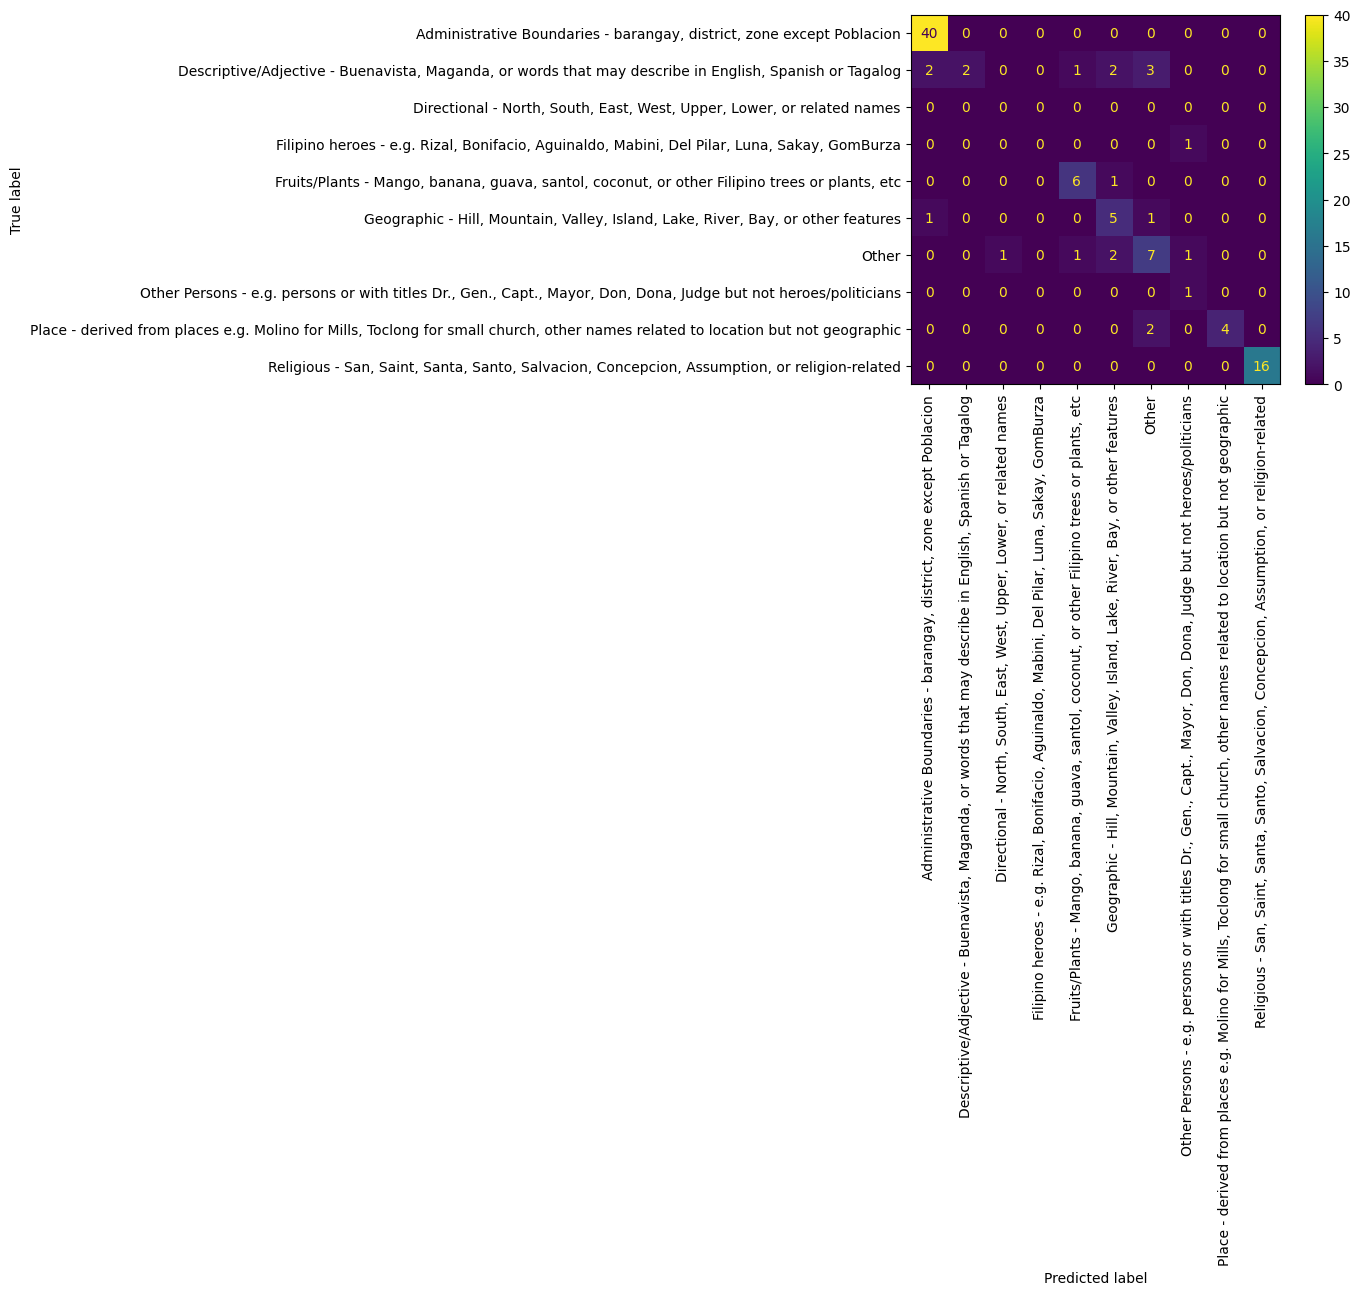

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(handcoded["groundtruth"], handcoded["ai_guess"],  xticks_rotation="vertical");
display(Markdown("""
  This is a confusion matrix, that displays the count of each combo of possible answers and predictions.
  """))

In [80]:
# calculate baseline
accuracy = accuracy_score(handcoded["groundtruth"], handcoded["ai_guess"])
most_common_answer = handcoded.groupby("groundtruth").count().idxmax().ai_guess
baseline = accuracy_score(handcoded["groundtruth"], [most_common_answer] * len(handcoded["ai_guess"]))


display(Markdown("""is {:.1%} good? Well, let's measure *model skill*. Is the AI _doing anything_?

Let's compare it to the stupidest model possible, that just guesses the most common class ({}) for all outputs. That **baseline** is {:.1%}.

How does {:.1%} compare to {:.1%}?
""".format(
    accuracy,
    most_common_answer,
    baseline,
    accuracy,
    baseline
)))

is 81.0% good? Well, let's measure *model skill*. Is the AI _doing anything_?

Let's compare it to the stupidest model possible, that just guesses the most common class (Administrative Boundaries - barangay, district, zone except Poblacion) for all outputs. That **baseline** is 40.0%.

How does 81.0% compare to 40.0%?


In [81]:
if accuracy <= baseline:
  new_baseline = accuracy_score(handcoded["groundtruth"], ["NOT INSULTING US PLACE"] * len(handcoded["2-way_category_ai"]))

  display(Markdown("""
    The model is doing worse than (or maybe even with) the baseline.

    But that comparison treats false-positives and false-negatives as equally bad. That might not be right for your problem. For the insults problem,
    all we want to do is shrink the haystack. A baseline that guesses nothing is an insult (as our baseline does) is useless to us. The real
    baseline (reading all of Trump's tweets to find place insults) would be guessing the insult class for everything. That baseline gets {:.1%} --
    way worse than {}. Phew.

    This makes intuitive sense. An AI classification that shrinks the haystack, with a mixture of false-positives and true-positives for us to look at
    is actually really helpful.
  """.format(
      new_baseline,
      accuracy
  )))
else:
  display(Markdown("""
    The model is doing better than baseline.

    But maybe we can do even better. Look at the model's mistakes below, adjust the prompt, and see if the accuracy score (or your chosen metric) goes up.
  """))

with pd.option_context("display.max_colwidth", 500):
  display(
      handcoded[handcoded["ai_guess"] != handcoded["groundtruth"]][["barangay_clean", "groundtruth", "ai_guess"]]
  )


    The model is doing better than baseline.

    But maybe we can do even better. Look at the model's mistakes below, adjust the prompt, and see if the accuracy score (or your chosen metric) goes up.
  

,barangay_clean,groundtruth,ai_guess
0,Pangil,"Descriptive/Adjective - Buenavista, Maganda, or words that may describe in English, Spanish or Tagalog","Geographic - Hill, Mountain, Valley, Island, Lake, River, Bay, or other features"
3,Maharlika Village,"Descriptive/Adjective - Buenavista, Maganda, or words that may describe in English, Spanish or Tagalog",Other
8,Entablado,"Place - derived from places e.g. Molino for Mills, Toclong for small church, other names related to location but not geographic",Other
18,Minantok Kanluran,Other,"Directional - North, South, East, West, Upper, Lower, or related names"
34,Congbalay-Legaspi,Other,"Other Persons - e.g. persons or with titles Dr., Gen., Capt., Mayor, Don, Dona, Judge but not heroes/politicians"
40,Tambo Kulit,"Descriptive/Adjective - Buenavista, Maganda, or words that may describe in English, Spanish or Tagalog","Fruits/Plants - Mango, banana, guava, santol, coconut, or other Filipino trees or plants, etc"
44,Bucal III B,"Geographic - Hill, Mountain, Valley, Island, Lake, River, Bay, or other features","Administrative Boundaries - barangay, district, zone except Poblacion"
48,Botocan,Other,"Geographic - Hill, Mountain, Valley, Island, Lake, River, Bay, or other features"
56,Wakas II,"Descriptive/Adjective - Buenavista, Maganda, or words that may describe in English, Spanish or Tagalog",Other
77,Pasolo,Other,"Geographic - Hill, Mountain, Valley, Island, Lake, River, Bay, or other features"


# Improving the prompt

In [82]:
new_prompt_base = """

I have barangay names and I want to classify it into one of these categories: {categories}.

Think step-by-step about what the name could mean based on its words or origin.

Give only the category name.

Example:
Barangay name: San Isidro  
Reasoning: 'San' means saint, so it relates to religion.  
Category: Religious

Barangay name: Buenavista  
Reasoning: It means 'good view' in Spanish, so it describes a place's feature.  
Category: Descriptive

Now classify this name:

Barangay name: {barangay_name}
Category:


"""



data_sample_new_prompt_column = handcoded.apply(lambda row: new_prompt_base.format(
    barangay_name=row[text_column_name],
    categories=", ".join(['"{}"'.format(opt.value) for opt in barangay_classifications])
), axis="columns")
token_count_sample = count_tokens_for_our_model("SAMPLE RESPONSE SAMPLE RESPONSE".join(data_sample_new_prompt_column))
"Sample would cost: ${:.4f}".format(estimate_cost(MODEL_TO_USE, token_count_sample))

'Sample would cost: $0.0168'

In [83]:
handcoded["new_ai_guess"] = data_sample_new_prompt_column.progress_apply(classify)

  0%|          | 0/100 [00:00<?, ?it/s]

In [84]:
accuracy = accuracy_score(handcoded["groundtruth"], handcoded["new_ai_guess"])
original_prompt_accuracy = accuracy_score(handcoded["groundtruth"], handcoded["ai_guess"])

In [85]:
display(Markdown("""
  Your new prompt got an accuracy rate of {:.1%}. Is that better than {:.1%}?

  Should we be using a different metric? (You tell me!)

  Keep trying new stuff until it's good enough (whatever that means!) or you get bored.

  Then you can classify the whole dataset.
""".format(accuracy, original_prompt_accuracy)))


  Your new prompt got an accuracy rate of 82.0%. Is that better than 81.0%?

  Should we be using a different metric? (You tell me!)

  Keep trying new stuff until it's good enough (whatever that means!) or you get bored.

  Then you can classify the whole dataset.


**Tried a new prompt a couple of times but nothing beats my original prompt's score.**

# Checking only religious category

In [87]:
from sklearn.metrics import precision_score, recall_score
display(Markdown("Precision score: {:.1%}. Is that good?".format(
    precision_score(handcoded["groundtruth"] == barangay_classifications.religious, handcoded["ai_guess"] == barangay_classifications.religious)
)))


from sklearn.metrics import precision_score, recall_score
display(Markdown("Recall score: {:.1%}. Is that good?".format(
    recall_score(handcoded["groundtruth"] == barangay_classifications.religious, handcoded["ai_guess"] == barangay_classifications.religious)
)))

Precision score: 100.0%. Is that good?

Recall score: 100.0%. Is that good?

# Doing the entire thing

In [ ]:
# Just an extra step to make sure we're not running this without knowing

okay_to_do_the_whole_thing = input()

In [ ]:
# We're using the old prompt because it's still better than the new onr

data_full_prompt_column = prompt_base + barangay_full[text_column_name]

In [ ]:
## classifying full prompt

barangay_full["ai_guess"] = data_full_prompt_column.progress_apply(classify)
barangay_full.to_csv(data_dir + 'handcoding_barangay.csv')

In [ ]:
barangay_full.head()

In [ ]:
barangay_full["ai_guess"].value_counts()

Factchecking AI guess

In [110]:
factchecked = pd.read_csv("groundtruth.csv")
if "groundtruth" not in factchecked.columns:
  print("uh oh, your handcoded.csv doesn't have a column named groundtruth")
  assert "groundtruth" in factchecked.columns
if factchecked.groundtruth.isna().any():
  print("uh oh, there are some blanks in your handcoded.csv's groundtruth column. go fix that!")

In [111]:
from sklearn.metrics import accuracy_score
display(Markdown("Accuracy score: {:.1%}. Is that good?".format(
    accuracy_score(factchecked["groundtruth"], factchecked["ai_guess"])
)))

Accuracy score: 76.6%. Is that good?

My answer: Well, it's good enough.

# Analysis

* What is the most common category?

In [112]:
factchecked['factchecked_category'] = factchecked["groundtruth"].str.split("-").str[0]

In [113]:
factchecked.head()

,barangay_clean,barangay_alt_name,barangay_psgc,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_name,region_psgc,...,helper,category,ai_guess,barangay_raw,groundtruth,Checked?,match category-ai guess,match ai-groundtruth,Notes,factchecked_category
0,Banaban,NaN,PH0301401001,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,...,NaN,Other,Other,Banaban,Other,True,True,True,NaN,Other
1,Baybay,NaN,PH0301401002,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,...,NaN,Other,"Geographic - Hill, Mountain, Valley, Island, L...",Baybay,"Geographic - Hill, Mountain, Valley, Island, L...",True,True,True,NaN,Geographic
2,Binagbag,NaN,PH0301401003,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,...,NaN,Other,Place - derived from places e.g. Molino for Mi...,Binagbag,Other,True,True,False,NaN,Other
3,Donacion,NaN,PH0301401005,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,...,NaN,Other Persons,Other Persons - e.g. persons or with titles Dr...,Donacion,Other,True,True,False,Donation?,Other
4,Encanto,NaN,PH0301401006,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,...,NaN,Other,"Descriptive/Adjective - Buenavista, Maganda, o...",Encanto,"Descriptive/Adjective - Buenavista, Maganda, o...",True,False,True,Engkanto,Descriptive/Adjective


In [114]:
factchecked['factchecked_category'] = factchecked['factchecked_category'].str.strip()

In [115]:
factchecked.to_csv('factchecked.csv',index=False)

In [103]:
categories = factchecked['factchecked_category'].value_counts().reset_index()
categories.columns = ['factchecked_category', 'count']
categories['percent'] = 100 * categories['count'] / len(factchecked)

categories

,factchecked_category,count,percent
0,Administrative Boundaries,1489,37.374498
1,Other,530,13.303213
2,Religious,475,11.922691
3,Descriptive/Adjective,445,11.169679
4,Fruits/Plants,273,6.852410
5,Geographic,272,6.827309
6,Place,143,3.589357
7,Other Persons,120,3.012048
8,Town Proper,78,1.957831
9,Directional,56,1.405622


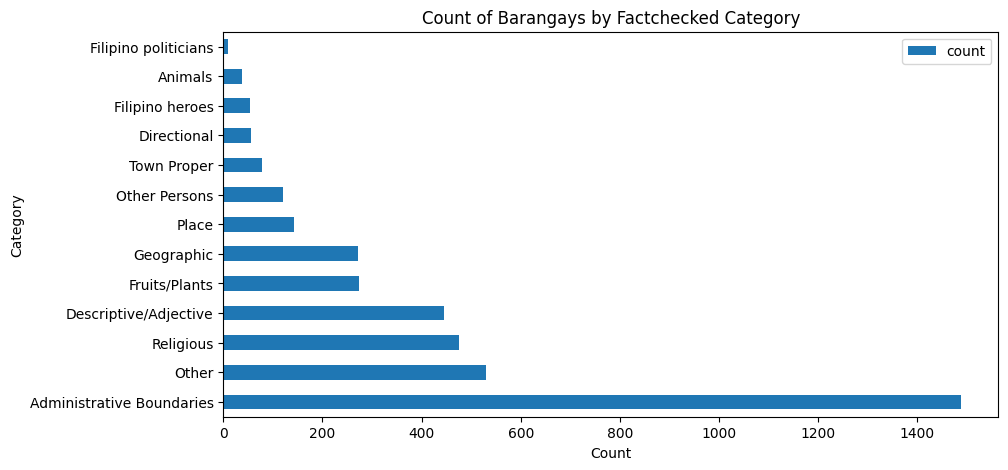

In [96]:
categories_plot = categories.plot(kind='barh', x='factchecked_category', y='count', figsize=(10,5))
categories_plot.set_title("Count of Barangays by Factchecked Category")
categories_plot.set_xlabel("Count")
categories_plot.set_ylabel("Category")
plt.show()

* Which category is the most common among provinces?

In [145]:
common_category_province = (
    factchecked.groupby(['province', 'factchecked_category'])
    .size()
    .reset_index(name='count')
)

In [146]:
top_category_province = common_category_province.loc[
    common_category_province.groupby('province')['count'].idxmax()
].reset_index(drop=True)

top_category_province

,province,factchecked_category,count
0,Bulacan,Other,143
1,Cavite,Descriptive/Adjective,142
2,Laguna,Other,174
3,Metropolitan Manila First District,Administrative Boundaries,897
4,Metropolitan Manila Fourth District,Administrative Boundaries,201
5,Metropolitan Manila Second District,Descriptive/Adjective,57
6,Metropolitan Manila Third District,Administrative Boundaries,188
7,Rizal,Religious,51


* What is the most common barangay name per category?

In [147]:
common_category_barangay = (
    factchecked.groupby(['factchecked_category', 'barangay_clean'])
    .size()
    .reset_index(name='count')
)

In [148]:
top_category_barangay = common_category_barangay.loc[
    common_category_barangay.groupby('factchecked_category')['count'].idxmax()
].reset_index(drop=True)

top_category_barangay

,factchecked_category,barangay_clean,count
0,Administrative Boundaries,Barangay 1,8
1,Animals,Malinta,2
2,Descriptive/Adjective,Bagumbayan,10
3,Directional,Kanluran,4
4,Filipino heroes,Rizal,5
5,Filipino politicians,Magsaysay,2
6,Fruits/Plants,Calumpang,7
7,Geographic,Longos,7
8,Other,Bubukal,3
9,Other Persons,Perez,3


* Which names under the 'Religious' category are most common among provinces?

In [149]:
religious_names = factchecked[factchecked['factchecked_category'] == 'Religious']

religious_names.head()

,barangay_clean,barangay_alt_name,barangay_psgc,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_name,region_psgc,...,helper,category,ai_guess,barangay_raw,groundtruth,Checked?,match category-ai guess,match ai-groundtruth,Notes,factchecked_category
10,San Roque,NaN,PH0301401014,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,...,Duplicate,Religious,"Religious - San, Saint, Santa, Santo, Salvacio...",San Roque (Pob.),"Religious - San, Saint, Santa, Santo, Salvacio...",True,True,True,NaN,Religious
11,Santa Cruz,NaN,PH0301401015,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,...,Duplicate,Religious,"Religious - San, Saint, Santa, Santo, Salvacio...",Santa Cruz (Pob.),"Religious - San, Saint, Santa, Santo, Salvacio...",True,True,True,NaN,Religious
12,Santa Lucia,NaN,PH0301401016,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,...,Duplicate,Religious,"Religious - San, Saint, Santa, Santo, Salvacio...",Santa Lucia,"Religious - San, Saint, Santa, Santo, Salvacio...",True,True,True,NaN,Religious
13,Santo Cristo,NaN,PH0301401017,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,...,Duplicate,Religious,"Religious - San, Saint, Santa, Santo, Salvacio...",Santo Cristo (Pob.),"Religious - San, Saint, Santa, Santo, Salvacio...",True,True,True,NaN,Religious
22,San Juan,NaN,PH0301402009,Balagtas (Bigaa),PH0301402,Bulacan,PH03014,Region III,Central Luzon,PH03,...,Duplicate,Religious,"Religious - San, Saint, Santa, Santo, Salvacio...",San Juan,"Religious - San, Saint, Santa, Santo, Salvacio...",True,True,True,NaN,Religious


In [150]:
common_religious_barangay = (
    religious_names.groupby(['province', 'barangay_clean'])
    .size()
    .reset_index(name='count')
)

In [151]:
top_religious_barangay = common_religious_barangay.loc[
    common_religious_barangay.groupby('province')['count'].idxmax()
].reset_index(drop=True)

top_religious_barangay

,province,barangay_clean,count
0,Bulacan,San Jose,7
1,Cavite,San Jose,4
2,Laguna,San Antonio,8
3,Metropolitan Manila Fourth District,San Antonio,2
4,Metropolitan Manila Second District,San Jose,3
5,Metropolitan Manila Third District,Concepcion,1
6,Rizal,San Isidro,6


* Which names under the 'Descriptive/Adjective' category are most common among provinces?

In [117]:
descriptive_names = factchecked[factchecked['factchecked_category'] == 'Descriptive/Adjective']

descriptive_names.head()

,barangay_clean,barangay_alt_name,barangay_psgc,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_name,region_psgc,...,helper,category,ai_guess,barangay_raw,groundtruth,Checked?,match category-ai guess,match ai-groundtruth,Notes,factchecked_category
4,Encanto,NaN,PH0301401006,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,...,NaN,Other,"Descriptive/Adjective - Buenavista, Maganda, o...",Encanto,"Descriptive/Adjective - Buenavista, Maganda, o...",True,False,True,Engkanto,Descriptive/Adjective
25,Bagong Nayon,NaN,PH0301403001,City of Baliwag,PH0301403,Bulacan,PH03014,Region III,Central Luzon,PH03,...,Duplicate,Other,"Descriptive/Adjective - Buenavista, Maganda, o...",Bagong Nayon,"Descriptive/Adjective - Buenavista, Maganda, o...",True,False,True,NaN,Descriptive/Adjective
30,Hinukay,NaN,PH0301403006,City of Baliwag,PH0301403,Bulacan,PH03014,Region III,Central Luzon,PH03,...,NaN,Other,"Geographic - Hill, Mountain, Valley, Island, L...",Hinukay,"Descriptive/Adjective - Buenavista, Maganda, o...",True,True,False,NaN,Descriptive/Adjective
31,Makinabang,NaN,PH0301403007,City of Baliwag,PH0301403,Bulacan,PH03014,Region III,Central Luzon,PH03,...,NaN,Other,"Descriptive/Adjective - Buenavista, Maganda, o...",Makinabang,"Descriptive/Adjective - Buenavista, Maganda, o...",True,False,True,NaN,Descriptive/Adjective
44,Subic,NaN,PH0301403022,City of Baliwag,PH0301403,Bulacan,PH03014,Region III,Central Luzon,PH03,...,NaN,Other,Place - derived from places e.g. Molino for Mi...,Subic,"Descriptive/Adjective - Buenavista, Maganda, o...",True,True,False,NaN,Descriptive/Adjective


In [118]:
common_descriptive_barangay = (
    descriptive_names.groupby(['province', 'barangay_clean'])
    .size()
    .reset_index(name='count')
)

In [119]:
top_descriptive_barangay = common_descriptive_barangay.loc[
    common_descriptive_barangay.groupby('province')['count'].idxmax()
].reset_index(drop=True)

top_descriptive_barangay

,province,barangay_clean,count
0,Bulacan,Caingin,4
1,Cavite,Amaya I,1
2,Laguna,Malinao,4
3,Metropolitan Manila Fourth District,Baclaran,1
4,Metropolitan Manila Second District,Amihan,1
5,Metropolitan Manila Third District,Bagbaguin,1
6,Rizal,Bagumbayan,3


* Which names under the 'Fruits/Plants' category are most common among provinces?

In [120]:
plant_names = factchecked[factchecked['factchecked_category'] == 'Fruits/Plants']

plant_names.head()

,barangay_clean,barangay_alt_name,barangay_psgc,city/municipality,city/mun_psgc,province,province_psgc,region_number,region_name,region_psgc,...,helper,category,ai_guess,barangay_raw,groundtruth,Checked?,match category-ai guess,match ai-groundtruth,Notes,factchecked_category
7,Niugan,NaN,PH0301401009,Angat,PH0301401,Bulacan,PH03014,Region III,Central Luzon,PH03,...,Duplicate,Other,"Fruits/Plants - Mango, banana, guava, santol, ...",Niugan,"Fruits/Plants - Mango, banana, guava, santol, ...",True,True,True,NaN,Fruits/Plants
18,Dalig,NaN,PH0301402004,Balagtas (Bigaa),PH0301402,Bulacan,PH03014,Region III,Central Luzon,PH03,...,Duplicate,Other,Other,Dalig,"Fruits/Plants - Mango, banana, guava, santol, ...",True,True,False,NaN,Fruits/Plants
23,Santol,NaN,PH0301402010,Balagtas (Bigaa),PH0301402,Bulacan,PH03014,Region III,Central Luzon,PH03,...,Duplicate,Fruit/Plant,"Fruits/Plants - Mango, banana, guava, santol, ...",Santol,"Fruits/Plants - Mango, banana, guava, santol, ...",True,False,True,NaN,Fruits/Plants
58,Bolacan,NaN,PH0301404007,Bocaue,PH0301404,Bulacan,PH03014,Region III,Central Luzon,PH03,...,NaN,Other,Place - derived from places e.g. Molino for Mi...,Bolacan,"Fruits/Plants - Mango, banana, guava, santol, ...",True,True,False,NaN,Fruits/Plants
62,Duhat,NaN,PH0301404011,Bocaue,PH0301404,Bulacan,PH03014,Region III,Central Luzon,PH03,...,Duplicate,Fruit/Plant,"Fruits/Plants - Mango, banana, guava, santol, ...",Duhat,"Fruits/Plants - Mango, banana, guava, santol, ...",True,False,True,NaN,Fruits/Plants


In [121]:
common_plant_barangay = (
    plant_names.groupby(['province', 'barangay_clean'])
    .size()
    .reset_index(name='count')
)

In [122]:
top_plant_barangay = common_plant_barangay.loc[
    common_plant_barangay.groupby('province')['count'].idxmax()
].reset_index(drop=True)

top_plant_barangay

,province,barangay_clean,count
0,Bulacan,Balite,3
1,Cavite,Santol,2
2,Laguna,Calumpang,3
3,Metropolitan Manila Fourth District,Aguho,1
4,Metropolitan Manila Second District,Calumpang,1
5,Metropolitan Manila Third District,Acacia,1
6,Rizal,Dalig,3


* Which province has the most number of barangays?

In [123]:
factchecked['province'].value_counts().head(10)

province
Metropolitan Manila First District     899
Cavite                                 829
Laguna                                 682
Bulacan                                572
Metropolitan Manila Fourth District    317
Metropolitan Manila Third District     260
Metropolitan Manila Second District    236
Rizal                                  189
Name: count, dtype: int64

* What are the 10 most common barangay name across provinces?

In [120]:
factchecked['barangay_clean'].value_counts().head(11)

barangay_clean
Poblacion      29
San Jose       25
San Roque      24
San Isidro     19
Santo Nino     18
San Juan       17
San Antonio    12
Santa Cruz     11
San Miguel     11
San Agustin    10
Bagumbayan     10
Name: count, dtype: int64

* What are the most common names per province?

In [125]:
common_name_province = (
    factchecked.groupby(['province', 'barangay_clean'])
    .size()
    .reset_index(name='count')
)

In [126]:
top_barangays = common_name_province.loc[
    common_name_province.groupby('province')['count'].idxmax()
].reset_index(drop=True)

top_barangays

,province,barangay_clean,count
0,Bulacan,Poblacion,16
1,Cavite,Barangay 1,4
2,Laguna,San Antonio,8
3,Metropolitan Manila First District,Barangay 1,1
4,Metropolitan Manila Fourth District,Poblacion,3
5,Metropolitan Manila Second District,San Jose,3
6,Metropolitan Manila Third District,Acacia,1
7,Rizal,San Isidro,6


* How many barangays share the exact same name but belong to different provinces?

In [127]:
province_counts = (
    factchecked.groupby('barangay_clean')['province']
    .nunique()
    .reset_index(name='num_provinces')
)

shared_names = province_counts[province_counts['num_provinces'] > 1]

In [128]:
len(shared_names)

384

In [129]:
province_lists = (
    factchecked.groupby('barangay_clean')['province']
    .unique()
    .reset_index(name='provinces')
)

shared_names = shared_names.merge(province_lists, on='barangay_clean')

In [130]:
shared_names['barangay_clean'].to_list()

['Acacia',
 'Amuyong',
 'Baclaran',
 'Bagbaguin',
 'Bagong Nayon',
 'Bagong Pag-asa',
 'Bagong Silang',
 'Bagumbayan',
 'Balayong',
 'Balibago',
 'Balite',
 'Balubad',
 'Bambang',
 'Banaba',
 'Banaybanay',
 'Banca-banca',
 'Bancal',
 'Bangkal',
 'Barangay 1',
 'Barangay 10',
 'Barangay 100',
 'Barangay 101',
 'Barangay 102',
 'Barangay 103',
 'Barangay 104',
 'Barangay 105',
 'Barangay 106',
 'Barangay 107',
 'Barangay 108',
 'Barangay 109',
 'Barangay 11',
 'Barangay 110',
 'Barangay 111',
 'Barangay 112',
 'Barangay 113',
 'Barangay 114',
 'Barangay 115',
 'Barangay 116',
 'Barangay 117',
 'Barangay 118',
 'Barangay 119',
 'Barangay 12',
 'Barangay 120',
 'Barangay 121',
 'Barangay 122',
 'Barangay 123',
 'Barangay 124',
 'Barangay 125',
 'Barangay 126',
 'Barangay 127',
 'Barangay 128',
 'Barangay 129',
 'Barangay 13',
 'Barangay 130',
 'Barangay 131',
 'Barangay 132',
 'Barangay 133',
 'Barangay 134',
 'Barangay 135',
 'Barangay 136',
 'Barangay 137',
 'Barangay 138',
 'Barangay 13

In [131]:
shared_names.sort_values(by='num_provinces', ascending=False).head(4)

,barangay_clean,num_provinces,provinces
341,San Roque,7,"[Bulacan, Cavite, Laguna, Rizal, Metropolitan ..."
304,Poblacion,7,"[Bulacan, Cavite, Laguna, Rizal, Metropolitan ..."
325,San Jose,6,"[Bulacan, Cavite, Laguna, Rizal, Metropolitan ..."
332,San Miguel,6,"[Bulacan, Cavite, Laguna, Rizal, Metropolitan ..."


In [132]:
shared_names.to_csv('shared_barangay_names.csv',index=False)

* How many barangays share the exact same name but belong to different cities?

In [121]:
city_counts = (
    factchecked.groupby('barangay_clean')['city/municipality']
    .nunique()
    .reset_index(name='num_city')
)

shared_names_city = city_counts[city_counts['num_city'] > 1]

len(shared_names_city)

445

In [123]:
city_lists = (
    factchecked.groupby('barangay_clean')['city/municipality']
    .unique()
    .reset_index(name='city')
)

shared_names_city_list = shared_names_city.merge(city_lists, on='barangay_clean')

In [128]:
shared_names_city_list.sort_values(by='num_city', ascending=False).head(15)

,barangay_clean,num_city,city
340,Poblacion,29,"[City of Baliwag, Bocaue, Bustos, Calumpit, Gu..."
371,San Jose,25,"[City of Baliwag, Bulacan, Calumpit, Hagonoy, ..."
393,San Roque,24,"[Angat, City of Baliwag, Hagonoy, Pandi, Paomb..."
369,San Isidro,19,"[Hagonoy, City of San Jose del Monte, Bay, Cab..."
415,Santo Nino,18,"[City of Baliwag, Calumpit, Hagonoy, City of M..."
372,San Juan,17,"[Balagtas (Bigaa), Hagonoy, City of Malolos, S..."
359,San Antonio,12,"[Bay, City of Biñan, Kalayaan, Los Baños, Luis..."
380,San Miguel,11,"[Calumpit, Hagonoy, City of Dasmariñas, Alamin..."
400,Santa Cruz,11,"[Angat, Guiguinto, Hagonoy, Paombong, Santa Ma..."
357,San Agustin,10,"[Hagonoy, City of Malolos, San Miguel, San Raf..."


One more time, but with the PSGC

In [131]:
city_lists = (
    factchecked.groupby('barangay_clean')
    .agg({
        'city/municipality': lambda x: x.unique(),
        'barangay_psgc': lambda x: x.unique()
    })
    .reset_index()
    .rename(columns={
        'city/municipality': 'city'
    })
)

shared_names_city_list = shared_names_city.merge(city_lists, on='barangay_clean')

shared_names_city_list.sort_values(by='num_city', ascending=False).head(15)

,barangay_clean,num_city,city,barangay_psgc
340,Poblacion,29,"[City of Baliwag, Bocaue, Bustos, Calumpit, Gu...","[PH0301403014, PH0301404014, PH0301406010, PH0..."
371,San Jose,25,"[City of Baliwag, Bulacan, Calumpit, Hagonoy, ...","[PH0301403017, PH0301405010, PH0301407023, PH0..."
393,San Roque,24,"[Angat, City of Baliwag, Hagonoy, Pandi, Paomb...","[PH0301401014, PH0301403018, PH0301409018, PH0..."
369,San Isidro,19,"[Hagonoy, City of San Jose del Monte, Bay, Cab...","[PH0301409009, PH0301420044, PH0403402011, PH0..."
415,Santo Nino,18,"[City of Baliwag, Calumpit, Hagonoy, City of M...","[PH0301403021, PH0301407027, PH0301409023, PH0..."
372,San Juan,17,"[Balagtas (Bigaa), Hagonoy, City of Malolos, S...","[PH0301402009, PH0301409012, PH0301410043, PH0..."
359,San Antonio,12,"[Bay, City of Biñan, Kalayaan, Los Baños, Luis...","[PH0403402010, PH0403403019, PH0403409002, PH0..."
380,San Miguel,11,"[Calumpit, Hagonoy, City of Dasmariñas, Alamin...","[PH0301407025, PH0301409013, PH0402106036, PH0..."
400,Santa Cruz,11,"[Angat, Guiguinto, Hagonoy, Paombong, Santa Ma...","[PH0301401015, PH0301408009, PH0301409020, PH0..."
357,San Agustin,10,"[Hagonoy, City of Malolos, San Miguel, San Raf...","[PH0301409008, PH0301410041, PH0301421043, PH0..."


In [132]:
shared_names_city_list.to_csv('shared_names_city_list.csv',index=False)